# 1. Understand the Problem Statement
Understanding the problem statement is of prime importance, since it provides the direction to move onto.<br>
Here,

<br>
<b>
    <i>The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.
    </i>
</b>

is the problem statement.


<hr>

# 2. Apply basic pre-processing
Basic pre-processing on the data needs to be applied in order to clean the mess already present in the data. The organized and clutter-free data forms the basis for further analysis.

In [1]:
# Making necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import warnings
import string

warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# Reading the necessary datset
train = pd.read_csv('../30-5-19/TwitterSentimentAnalysis/train_tweets.csv')
test = pd.read_csv('../30-5-19/TwitterSentimentAnalysis/test_tweets.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [118]:
test.head()

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0


The above displayed data consists of three columns which are <b>id</b>, <b>label</b>, <b>tweet</b>.<br> The <b>id</b> is kind of serial number of the dataset, the <b>label</b> is the target variable, ad finally the <b>tweet</b> is the textual data upon which all the necessary processing is to be done.

### Basic Analysis
From the analysis of top 5 data rows, following things are to be done.
<ol>
    <li>The names of the twitter handles have been asked by @user, hence these mentions are worthless, so we are supposed to remove them.</li>
    <li>The punctutations(',:), numbers or any special character (@,#,$,*) also don't give any useful information and are useless so we need to remove them as well.</li>
    <li>Most of the smaller words like 'pdx','is', 'his', 'all' are also not of any value to us, so we remove them as well.</li>
    <li>Once we are done with the above <b>3</b> steps then we can split the text into words or tokenize the words, which are the basics of any NLP task.</li>
    <li>In the <i><b>4th</b></i> tweet we find a word 'love', there can be words like 'lovable', 'loves', 'loving' in the other tweets. So, if we covert them to their root word, i.e., 'love' we can reduce the number of unique words in the text and also the meaning of the sentence remains unchanged.</li>
</ol>

<hr>

<i><b>Before performing all the pre-processing tasks, first of all lets combine the train and test dataset.</b></i>

## 1. Removing the @user tags

In [117]:
data = train.append(test, ignore_index=True, sort=False)
data['cleantweet'] = data['tweet'].apply(lambda x: " ".join([i for i in x.split() if not i.startswith('@')]))
data.head()

,id,label,tweet,cleantweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


## 2. Removing the punctutation and special characters

In [6]:
data['cleantweet'] = data['cleantweet'].str.replace('[^A-Za-z#]',' ')
data.head()

,id,label,tweet,cleantweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause they...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## 3. Removing the Smaller words & Stopwords
The smaller words having length less than or equal to 3 can be removed since they do not provide much of a value in the analysis process.
<br><br>
Also, the most common words in english lit. can also be removed since are no importance as such.

In [7]:
from nltk.corpus import stopwords
words = stopwords.words('english')

data['cleantweet'] = data['cleantweet'].apply(lambda x:" ".join([i for i in x.split() if i not in words]))
data.head()

,id,label,tweet,cleantweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit use cause offer wheelchair...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [8]:
data['cleantweet'] = data['cleantweet'].apply(lambda x: " ".join([i for i in x.split() if len(i)>3]))
data.head()

,id,label,tweet,cleantweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [9]:
# Count the frequency of each word. 
# To do so first join all the text and then split it, convert into series and finally apply value_counts()
word_freq = pd.Series((" ".join(data['cleantweet'])).split()).value_counts()[-10:]
word_freq

#maybenotanazi                                        1
#icymi                                                1
needtoreallyreadaboutherbackgroundevenifitsonlyfor    1
vynl                                                  1
dgara                                                 1
#representation                                       1
medusa                                                1
maccas                                                1
rolando                                               1
#revive                                               1
dtype: int64

## 4. Tokenization
We tokenize the words, i.e., we convert text data into individual words list.

In [10]:
tokeninized_words = data['cleantweet'].apply(lambda x: x.split())
tokeninized_words.head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: cleantweet, dtype: object

## 5. Stemming
Stemming of words removes the suffix letters such as <b><i>"ing"</i></b>, <b><i>"ly"</i></b>, <b><i>"s"</i>
</b>, etc from the words and gives us a cleaner word.

### Note: Don't apply stemming, lemmatize whenever possible 

In [22]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

tokeninized_words = tokeninized_words.apply(lambda x: [stemmer.stem(i) for i in x])
tokeninized_words.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, cant, caus, dont, offer...
2                                    [bihday, majesti]
3                     [#model, love, take, time, ðððð]
4                         [factsguid, societi, #motiv]
Name: cleantweet, dtype: object

## 6. Lemmatization
Lemmatization is the coversion of words into their corresponding root words.

In [11]:
from textblob import Word

tokeninized_words = tokeninized_words.apply(lambda x: [Word(i).lemmatize() for i in x])
tokeninized_words.head()

0    [father, dysfunctional, selfish, drag, kid, dy...
1    [thanks, #lyft, credit, cause, offer, wheelcha...
2                                    [bihday, majesty]
3                           [#model, love, take, time]
4                   [factsguide, society, #motivation]
Name: cleantweet, dtype: object

In [12]:
word_freq = pd.Series((" ".join([" ".join(i) for i in tokeninized_words])).split()).value_counts()[:10]
word_freq

happy        2450
#love        2366
love         1968
time         1875
today        1581
like         1551
#positive    1331
make         1313
people       1257
life         1249
dtype: int64

### Final Steps
The <i><code><b>tokenized_words</b></code></i> is now the most cleaned data that we have and we can assign it to the 'cleantweets' column.<br><br>
<i><code><b>tokenized_words</b></code></i> is basically a pandas Series, which internally consists of a list in each row. So basically it's a list of list, therefore we need to covert each row-list into a string and then we can assign it to <code><i><b>data['cleantweet']</b></i></code> 

In [13]:
tokeninized_words = tokeninized_words.apply(lambda x:" ".join(x))
tokeninized_words.head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks #lyft credit cause offer wheelchair van...
2                                       bihday majesty
3                                #model love take time
4                       factsguide society #motivation
Name: cleantweet, dtype: object

The <code><i><b>tokenized_words</b></i></code> are now suitable for assigning to <code><i><b>data['cleantweet']</b></i></code>

In [14]:
data['cleantweet'] = tokeninized_words
data.head()

,id,label,tweet,cleantweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 4 columns):
id            49159 non-null int64
label         31962 non-null float64
tweet         49159 non-null object
cleantweet    49159 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


# 3. Story Generation and Visualization from Tweets
In this section we will be exploring the cleaned data. The process of exploration and visualization is of utmost importance for any kind of data whether numeric or textual.
<br><br>
Before we start exploring the data, we should question ourselves like:
<ul>
    <li>What are the most common words in the entire dataset?</li>
    <li>What are the most common words for positive and negative tweets, respectively?</li>
    <li>How any hashtags are present in the dataset?</li>
    <li>Which trends are associated with my dataset?</li>
    <li>Which trends are associated with either of the sentiments? Are they compatible with the sentiments?</li>
</ul>

## 1. Understanding the most common words: WordCloud
We want understand how sentiments are distributed across the dataset. One way to accomplish this task is by plotting a word cloud out of the dataset.
<br><br>
<b><i>A word cloud is a vizualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.</i></b> 
<br><br>

### Note:
<b><i>The word cloud generated is clutter free, i.e., it doesn't contain any punctuation and special characters.</i></b>

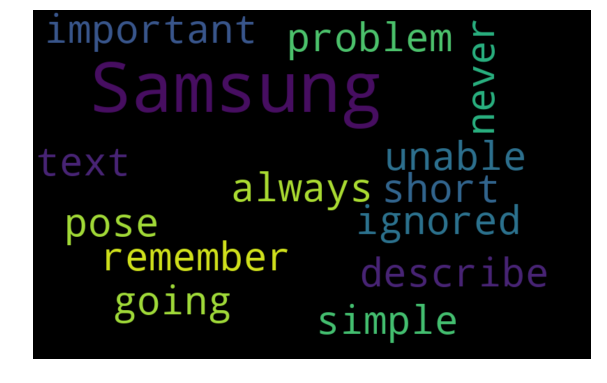

In [16]:
# The generate method cleans the textual data for punctuations and special characters.
from wordcloud import WordCloud
string = "Samsung@ is Samsung@ and Samsung@ is always going to be Samsung@, so Samsung@ should never be ignored\
 otherwise a simple Samsung@ can pose a problem that Samsung@ text is unable to describe.\
So in short remember Samsung@, 'Samsung@ is important!'"
wordCloud = WordCloud(width=800, height=500, max_font_size=100).generate(string)
plt.figure(figsize=(10,7))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

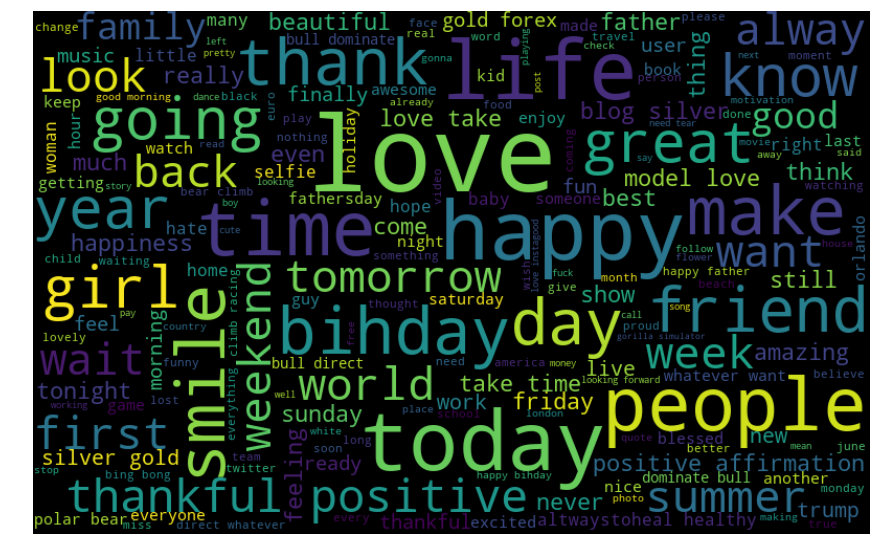

In [17]:
# Now working with our actual dataset
all_words = " ".join(data["cleantweet"])

# Forming a wordcloud of the dataset
from wordcloud import WordCloud
wordCloud = WordCloud(height=500, width=800, max_font_size=100).generate(all_words)

# Plotting the wordcloud formed
plt.figure(figsize=(15,10))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the words appearing the word cloud are either positive or neutral, like love, happy being on the positive side and words like people, bihday on the neutral side. So this doesn't provide much of an insight so what we can do is generate word cloud based on the labels already provided in the train dataset.

In [18]:
data.head()

,id,label,tweet,cleantweet
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause offer wheelchair van...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [19]:
# The label column is of data type float, so convert them into int, for simplification
train['label'] = train['label'].apply(lambda x: int(x)) #Data consists of null values as well
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


### 1.1 WordCloud for negative words

In [20]:
train.groupby(['label']).count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


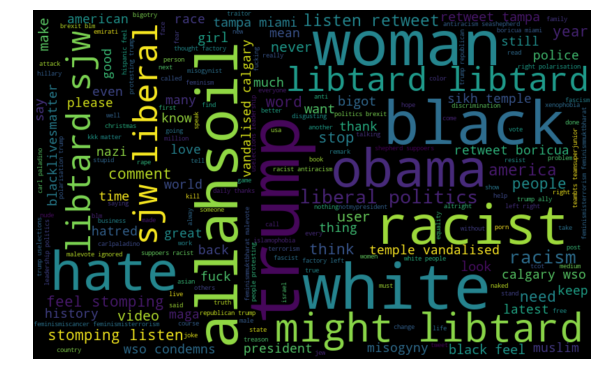

In [21]:
# Converting the ngative words into string since generate() method takes in string. 
negative_words = " ".join(data[data['label']==1]['cleantweet'])
from wordcloud import WordCloud

wordCloud = WordCloud(width=800, height=500, max_font_size=100).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off') #To prevent axis to display
plt.show()

### 1.2 WordCloud for positive words

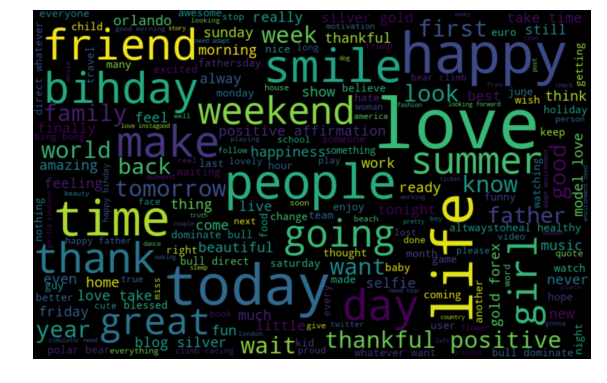

In [22]:
# COnverting positive label into a string
positive_words = " ".join(data[data['label']==0]['cleantweet'])

# Making necessary Imports, but since already imported, need to comment them rn.
#from wordcloud import WordCloud
wordCloud = WordCloud(height=500, width=800, max_font_size=100).generate(positive_words)

#Plotting the wordcloud formed out of the positive word string
plt.figure(figsize=(10,7))
plt.imshow(wordCloud, interpolation="gaussian")
plt.axis('off')
plt.show()

The positive wordcloud does look pretty similar to the whole datasets wordcloud, but that can be because of the proportion of positive and neutral statemnents being too high in dataset.

The negative wordcloud reveals there are enough negative statements in the dataset to work upon

## 2. Understanding the impact of hashtags on tweet sentiments
Hashtags in the twitter are synonimous to the trend ongoing at any paticular point of time. We should check whether these hashtags add any value to the sentiment analysis we're doing.

For instance, this is a tweet from our dataset,
<br>

<i><b>"what has today's attitude to women got in common with that of norman bates?#psycho#feminism#hollaback"</b></i>
<br>

The tweet seems sexist in nature and the hashtag in the tweet coveys the same feeling.
<br>

We will store all the trend terms in two separate lists - one for the neutral and positive statements and one for the negative statements.

In [23]:
#Function to extract the hashtags out of the tweet
def extract_hastags(tweet):
    hashtags = []
    for i in tweet:
        hashtags = hashtags + [hashes.strip('#') for hashes in i.split() if hashes.startswith('#')]
    return hashtags

In [24]:
hashtags_neutral = extract_hastags(data[data['label']==0]['cleantweet'])
hashtags_negative = extract_hastags(data[data['label']==1]['cleantweet'])

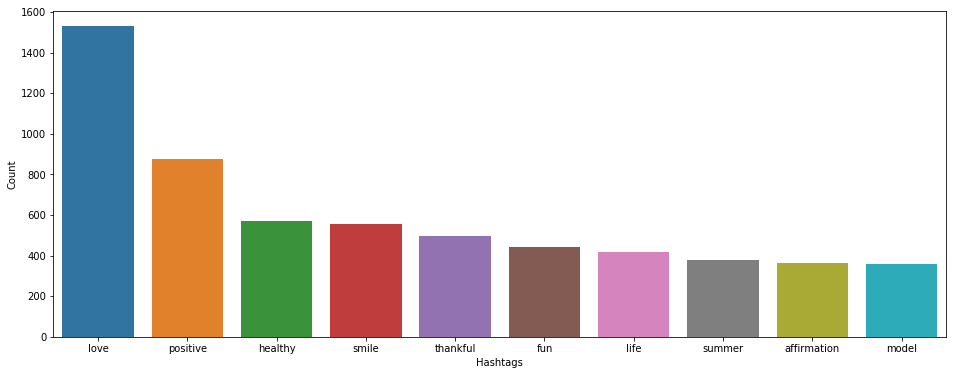

In [25]:
a = nltk.FreqDist(hashtags_neutral)
d = pd.DataFrame({'Hashtags':list(a.keys()),'Count':list(a.values())})

#selecting the top 10 most frequent hastags
d = d.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,6))
ax = sns.barplot(data=d,x='Hashtags',y='Count')
ax.set(ylabel='Count')
plt.show()

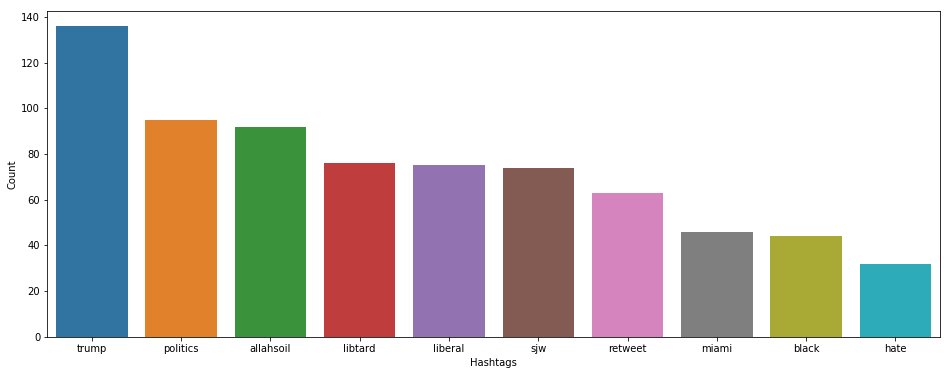

In [26]:
a = nltk.FreqDist(hashtags_negative)
d = pd.DataFrame({'Hashtags':list(a.keys()),'Count':list(a.values())})

#selecting the top 10 most frequent hastags
d = d.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,6))
ax = sns.barplot(data=d,x='Hashtags',y='Count')
ax.set(ylabel='Count')
plt.show()

# 4. Extracting Features From Cleaned Tweets
To analyze a preprocessed data, it needs to be converted into features. Depending upon the usge, text  features can be constructed using techiniques like Bag of Words(BoW), TF-IDF, and Word Embeddings.

### i. Bag of Words(BoW)
Bag of Words is a method to represent text into numerical features. Consider a corpus( a collection of texts) C of D documents(d1 to dD). The N unique token are extracted out of the corpus C. This will lead to a matrix of size DxN, where each row in the matrix corresponds to the document D(i) and each column corresponds to a unique token. The element at the intersection of the D and N corresponds to the frequency of the word or token in the D(i)th row.
<br>

Lets take an example.
<br>

D1: He is a lazy boy. She is also lazy.<br>
D2: Smith is a lazy person.
<br>

The list of unique tokens in the corpus C would be like:
<br>

['He', 'She', 'lazy', 'boy', 'Smith', 'person']
<br>

Here, D = 2 and N = 6<br>
The matrix would look like,
<br>
<table border="1">
    <tr>
        <td></td>
        <td>He</td>
        <td>She</td>
        <td>Lazy</td>
        <td>Boy</td>
        <td>Smith</td>
        <td>Person</td>
    </tr>
    <tr>
        <td>D1</td>
        <td>1</td>
        <td>1</td>
        <td>2</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>D2</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>1</td>
    </tr>
</table>
<br>

Now, the columns in the above matrix can be used as a feature to build a classification model. Bag-of-Words features can be easily created using <i>sklearn's</i> CountVectorizer function. We will set the parameter <code>max_features = 1000</code> to select only the top 1000 terms ordered by the frequncy across the corpus. 

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer =  CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english')

#bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(data['cleantweet'])

### ii. TF-IDF features
This is another method based upon the frequency of words but is different from bag-of-words, unlike bag of words it accounts for the frequency of word in single document, it takes into account the frequency of it in entire corpus.
<br>

TF-IDF penalizes the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in few good numbers in few documents.
<br>

Some important terms related to TF-IDF:
<br>
<ul>
    <li>(Number of times the term t appears in a document)/(Number of terms in the document(row/tweet))</li>
    <li>IDF = log(N/n), where N is the number of documents and n is the number of documents term t has appeared in</li>
    <li>TF-IDF = TF*IDF</li>

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

#TF-IDF feautre matrix
tfidf = tfid_vectorizer.fit_transform(data['cleantweet'])

## 5. Model Building: Sentiment Analysis
We are now done with the pre-modelling stages required to get the data in the proper form and shape.
<br>
Now we will build predictive models on the datset based on two feature set - Bag of Words and TF-IDF
<br>

We will use Logistic Regression to build the models. It predicts the probability of occurence of an event by fitting the data into a logit function

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

#splitting the data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

#creating object of logistic regression
model = LogisticRegression(solver="lbfgs")
model.fit(x_train, y_train) #training the model

#Making prediction form the trained model
prediction = model.predict_proba(x_test) #Calculating the probability
prediction = (prediction[:,1]>=0.26) #Converting the matrix into a matrix containing 1s and 0s

#Calculating the score of the model
f1_score(y_test, prediction)

0.5062240663900415

In [91]:
test_prediction = model.predict_proba(test_bow)
test_prediction = (test_prediction[:,1]>=0.26).astype(np.int)

test['label'] = test_prediction

In [98]:
test['tweet'][4]

'  3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ\x80¦ '

In [100]:
negative_tweets = test[test['label']==1]

In [101]:
negative_tweets.head()

,id,tweet,label
1,31964,@user #white #supremacists want everyone to s...,1
19,31982,thought factory: bbc neutrality on right wing ...,1
26,31989,chick gets fucked hottest naked lady,1
33,31996,suppo the #taiji fisherman! no bullying! no ra...,1
42,32005,@user @user trumps invested billions into saud...,1


In [106]:
negative_tweets['tweet'][42]

'@user @user trumps invested billions into saudi. he empowers the people funding isis.   #trumpsahypocrite'

In [116]:
#Training model based on tf-idf feature
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

train_x, test_x, train_y, test_y = train_test_split(train_tfidf, train['label'], random_state=42,test_size=0.3)

#Creating a model object
model = LogisticRegression(solver="lbfgs")
model.fit(train_x, train_y) #training the model

#Making prediction based on the trained model
prediction = model.predict_proba(test_x)
prediction = (prediction[:,1]>=0.3).astype(np.int)

#Calculating the f1_score
f1_score(y_test, prediction)

0.512589928057554